# Simulation Framework - example notebook

## 1) Modules import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

# Simulation Framework specific modules
from monitor import pickup
from components import cable
from components import analog_filter
from components import adc
from signal_operations import signal_operations as sop
from dsp import dsp
import bpm_chain


## 2) Configuration

In [2]:
config1=bpm_chain.ConfigTest()

In [3]:
# Beam configurations
# config1.bunch_c.set_x((3)*1e-3) #horizontal displacement of the bunch
# config1.bunch_c.set_y((-2)*1e-3) #vertical displacement of the bunch
# config1.bunch_c.set_intensity(1e11) #charges per bunch
# OR
config1.bunch_c.set_bunch(x=(3)*1e-3,y=(-2)*1e-3,intensity=3e11)
config1.bunch_c.set_sigma(265.5e-12) #sigma of the longitudinal distribution og the bunch, in seconds
config1.bunch_c.show()

Bunch Configuration:               
	 bunch position x (x) = 3.0 mm,              
	 bunch position y (y) = -2.0 mm,              
	 bunch intensity (intensity) = 30.0e10 cpb,              
	 bunch sigma length (sigma) = 265.5 ps,              
	 maximum bunch displacement (x_max) = 5.0 mm,              
	 maximum bunch intensity (int_max) = 30.0e10 ppb,              
	 minimum bunch intensity (int_min) = 0.1e10 ppb


In [4]:
# Pickup configuration
config1.pickup_c.set_source('analytic') #'analytic','file'
config1.pickup_c.set_lin(True)
config1.pickup_c.set_button() #OR config1.pickup_c.set_stripline()
config1.pickup_c.show()

Pickup Configuration main parameters:               
	 position characteristic linearity (lin) = True,              
	 type (type) = button,              
	 model (source) = analytic,              
	 electrode radius (r_button) = 12.0 mm,              
	 pipe radius (r_pipe) = 24.5 mm


In [5]:
#Analog stages: cable
config1.cable_c.set_length(64)
config1.cable_c.show()

Cable Configuration:               
	 length (length) = 64 m,              
	 cable geometric parameter (b) = 1.2e-07,              
	 cable propagation velocity (v) = 0.88 c


In [6]:
#Analog stages: combiner (see default configuration)
config1.combiner_c.set_delayAB(12e-9)
config1.combiner_c.show()

Combiner Configuration:               
	 Number of signals combined (timeMuxN) = 2,              
	 Delay between signal A and B (delayAB) = 1.2e-08 s,              
	 Delay between signal A and C (delayHV) = 6.25e-09 s,              
	 attenuation of the splitter (splitter_att) = 0.56,              
	 attenuation of the delay line (delay_att) = 0.9,              
	 Time distance between bunches (bunch_dist) = 2.495e-08 s


In [7]:
#Analog stages: filters
# config1.analog_filter_c.set_LP(LP_Wn=2e8, LP_N=4)
config1.analog_filter_c.set_comb(comb_att=0.98)
config1.analog_filter_c.show()

Analog Filters Configuration:                
	 Type of filter (analog) = comb,
	 number of repetitions (comb_rep) = 4,
	 delay between repetitions (comb_delta) = 2e-09,
	 attenuation of delay line (comb_att) = 0.98,


In [8]:
#Analog stage: amplifier (see default configuration)
config1.amplifier_c.set_amp_active(False)
config1.amplifier_c.show()

Amplifier Configuration:               
	 amplifier is active (amp_active) = False,              
	 noise figure (NF_dB) = 6 dB,              
	 noise spectral density at the output (ND_dBm) = -154 dBm,              
	 maximum gain (Av_max) = 8.128,              
	 minimum gain (Av_min) = 0.234,              
	 threshold gain in mixed architecture to activate active amplification (Av_th) = 5.01,              
	 maximum signal level at the input (Vin_max) = 7 V,              
	 active amplification is available (variable_gain) = False,              
	 mixed architecture passive/active is available (mixed_arch) = False


In [15]:
#Analog stage: anti aliasing filter
config1.antialiasing_filter_c.set_aaf(True,aafN=8,aafBw=1e9)
config1.antialiasing_filter_c.show()

Antialiasing Filters Configuration:                
	 Anti Aliasing Filter is active = True                
	 Anti Aliasing Filter bandwidth (aafBw) = 1000000000.0,                
	 Anti Aliasing Filter order (aafN) = 8,


In [10]:
#ADC stage, select a predefined chip among those described in adc.py
config1.adc_c.set_adctype(adc.htg_t)
config1.adc_c.show()
# # or manually set one from scratch
# config1.adc_c.set_adctype(adc.AdcType(name='new_ADC', fs=2e9, P2P=1., bits=14, enobs=9.8))
# config1.adc_c.show()
# change a specific parameter 
# config1.adc_c.set_enobs(9.3)
# config1.adc_c.show()

ADC Configuration:               
	 configuration type (adctype) = AD9208,              
	 sampling rate (fs) = 2.6 Gsps,              
	 input range peak to peak = 2.04 V,              
	 number of bits (bits) = 14,              
	 effective number of bits (enobs) = 9.6,              
	 sampling phase (mode) = asynch


In [11]:
#DSP stage 
config1.electrodeLen = 11.5e-9 # lenght of the window over which performing algorithm 6.4e-9 #4.4e-9 #3e-9  #8e-9 #11.5e-9 
config1.triggerOffset = 1.0e-9 # offset from bunch detection trigger 1e-9 #0.5e-9 #2.2e-9 #1.5e-9 # 4e-9
config1.replica_num = 800 #number of repetitions

#signal level adjustment
config1.fixAtt = False
config1.fixAttValue = 0.5 
config1.calTol = 0.67 #portion of the ADC input to be covered with the highest amplitude signal expected
config1.worstCaseAmp = True #factor 0.5 attenuation more than expected

## 3) Running simulation with given configuration

In [16]:
results=bpm_chain.test(config1)
label1='2.6 Gsps'

attenuation factor: 0.6343333854419544
signal generated
### WARNING: ADC Over range ###
master generated


## 4) Definition of a second configuration and simulation results

In [17]:
label2='3.2 GSps'
config2=copy.deepcopy(config1)
config2.bunch_c.set_bunch(x=(2)*1e-3,y=(0)*1e-3,intensity=1e11)
# config2.amplifier_c.set_amp_active(False)
config2.adc_c.set_adctype(adc.vadatech_t)
config2.adc_c.show()

results2=bpm_chain.test(config2)

ADC Configuration:               
	 configuration type (adctype) = TIADC12J4000,              
	 sampling rate (fs) = 3.2 Gsps,              
	 input range peak to peak = 0.725 V,              
	 number of bits (bits) = 12,              
	 effective number of bits (enobs) = 8.8,              
	 sampling phase (mode) = asynch
attenuation factor: 0.2254371100222632
signal generated
### WARNING: ADC Over range ###
master generated


## 5) Plot and comparison of the results

<IPython.core.display.Javascript object>


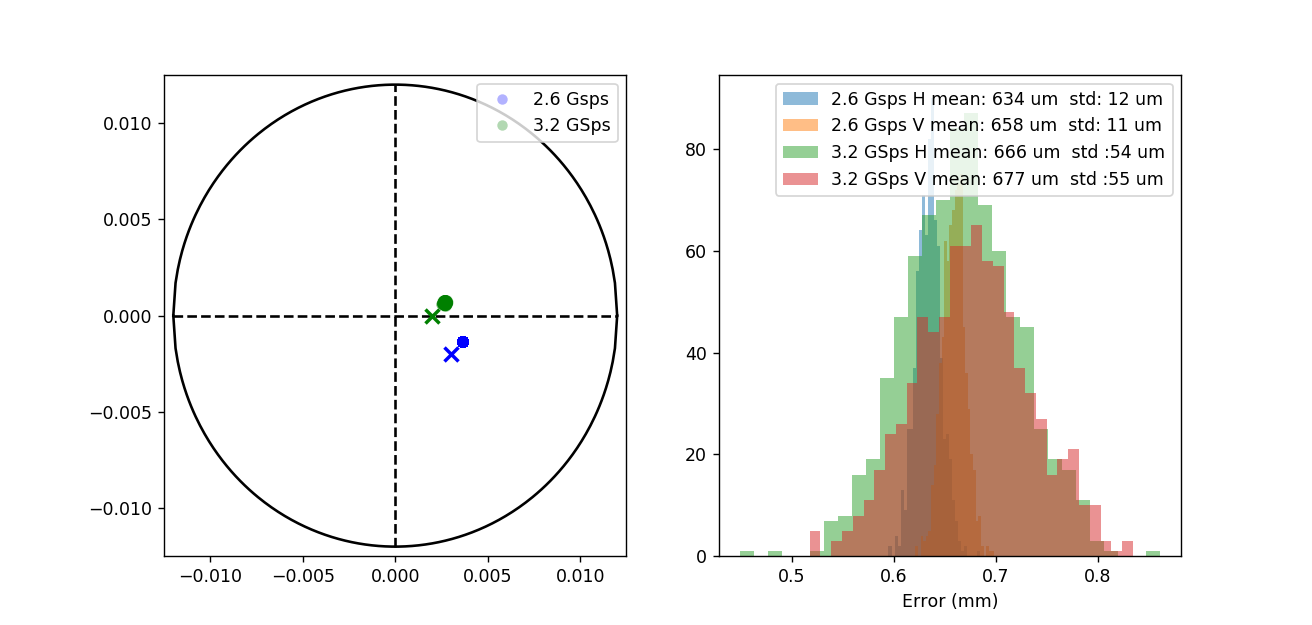

In [18]:
R = 12e-3
circle_x = np.linspace(-R,R,200)
circle_ypos = np.sqrt(R**2-np.square(circle_x))
circle_yneg = -1*np.sqrt(R**2-np.square(circle_x))

positionsToPlot = results[0]
errParamToShow = results[1]
positionsToPlot2 = results2[0]
errParamToShow2 = results2[1]

%matplotlib notebook
f=plt.figure(figsize=(10.5,5))
plt.subplot(121)
plt.plot(circle_x,circle_ypos, 'k')
plt.plot(circle_x,circle_yneg, 'k')

plt.plot(positionsToPlot[0,:],positionsToPlot[1,:], 'ob', alpha=0.3, label=label1, markeredgewidth=0)
plt.plot(positionsToPlot2[0,:],positionsToPlot2[1,:], 'og', alpha=0.3, label=label2, markeredgewidth=0)
plt.plot(np.zeros(circle_x.shape), circle_x, 'k--')
plt.plot(circle_x, np.zeros(circle_x.shape), 'k--')
plt.xlim([-R-5e-4,R+5e-4])
plt.ylim([-R-5e-4,R+5e-4])
plt.plot(config1.bunch_c.x,config1.bunch_c.y,'bx', markersize=8, markeredgewidth=2)
plt.plot(config2.bunch_c.x,config2.bunch_c.y,'gx', markersize=8, markeredgewidth=2)
plt.legend()
plt.subplot(122)
plt.hist((positionsToPlot[0,:]-config1.bunch_c.x)*1e3, bins=30, label=label1+' H mean: '+str(int(errParamToShow[0,0]*1e6))+' um  std: '+str(int(errParamToShow[1,0]*1e6))+' um', histtype='stepfilled', alpha=0.5)
plt.hist((positionsToPlot[1,:]-config1.bunch_c.y)*1e3, bins=30, label=label1+' V mean: '+str(int(errParamToShow[0,1]*1e6))+' um  std: '+str(int(errParamToShow[1,1]*1e6))+' um', histtype='stepfilled', alpha=0.5)
plt.hist((positionsToPlot2[0,:]-config2.bunch_c.x)*1e3, bins=30, label=label2+' H mean: '+str(int(errParamToShow2[0,0]*1e6))+' um  std :'+str(int(errParamToShow2[1,0]*1e6))+' um', histtype='stepfilled', alpha=0.5)
plt.hist((positionsToPlot2[1,:]-config2.bunch_c.y)*1e3, bins=30, label=label2+' V mean: '+str(int(errParamToShow2[0,1]*1e6))+' um  std :'+str(int(errParamToShow2[1,1]*1e6))+' um', histtype='stepfilled', alpha=0.5)
plt.xlabel('Error (mm)')
plt.legend()
plt.show()

## 6) Debug use and Signal inspection: Scope Mode

In [16]:
# to plot config 2 signals, change name for config1

#reduce the number of repetitions
config1.bunchnum = 2     

#generate the signal in Scope Mode
#signalScope contains [pickup signal,signal after cable,signal after combination,filtered signal,signal after ADC]
signalScope = bpm_chain.signalGen(config1, scopeMode=True)

#generate the "master" signal for trigger teneration
master = bpm_chain.masterGen(config1)

#generate the trigger
trigger = dsp.bunchDetector(matrix=signalScope[4][:,1:,:],master=master[0,1,:], electrodesPerSignal=config1.combiner_c.timeMuxN, bunchesPerTurn=3)

### WARNING: ADC Over range ###


In [17]:
#set parameters for DSP samples selection (same code as in the dsp.rmsSinglet function)

ts=signalScope[4][0,0,1]-signalScope[4][0,0,0] # sampling period, calculated as the second value minus the first in the time axis 
bunchOffset = 1                                # move the trigger from the first bunch (bunchOffset=0) to the last of the three (bunchOffset=2)
offset= 1e-9                                   # offset in time after the trigger to select the samples for DSP 
electrodeLen = 11.5e-9                         # duration in time of the electrode signal to be considered for DSP
bunchDist = 24.95e-9 #24.95e-9                 # time distance between bunches
electrodeDist = 12e-9                          # time distance between electrodes signals when combined
electrodeN= int(electrodeLen/ts)               # number of samples of the electrode signal to be considered for DSP

# Computation of the indeces relative to each electrode for each repetition
HA0   = trigger[:,0]+int((offset+bunchOffset*bunchDist)/ts)
HAindex = HA0[:,None] + np.arange(electrodeN)
HB0   = trigger[:,0]+int((offset+bunchOffset*bunchDist+electrodeDist)/ts)
HBindex = HB0[:,None] + np.arange(electrodeN)
VA0   = trigger[:,0]+int((offset+bunchOffset*bunchDist+config2.combiner_c.delayHV)/ts)
VAindex = VA0[:,None] + np.arange(electrodeN)
VB0   = trigger[:,0]+int((offset+bunchOffset*bunchDist+electrodeDist+config2.combiner_c.delayHV)/ts)
VBindex = VB0[:,None] + np.arange(electrodeN)


<IPython.core.display.Javascript object>


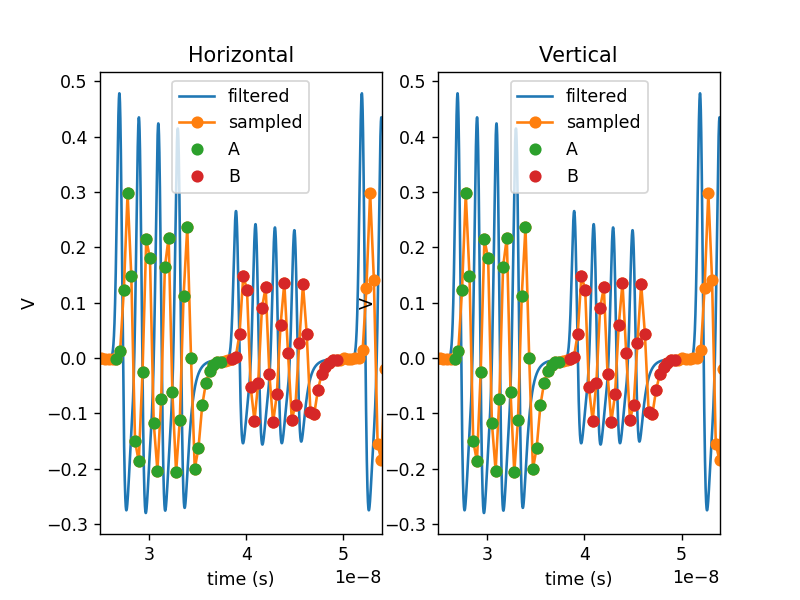

In [24]:
turn = 1     #selection of the repetition to plot, it must be < than config.bunchnum

%matplotlib notebook
plt.subplot(121)
plt.title('Horizontal')
# plt.plot(signalScope[0][0,:],np.transpose(signalScope[0][1:3,:]),label='pick-up')
# plt.plot(signalScope[1][0,:],np.transpose(signalScope[1][1:3,:]),label='cable')
# plt.plot(master[0][0,:],np.transpose(master[0][1,:]),'o-',label='master')
# plt.plot(signalScope[2][0,:],np.transpose(signalScope[2][1,:]),label='combined')
plt.plot(signalScope[3][0,:],np.transpose(signalScope[3][1,:]),label='filtered')
plt.plot(signalScope[4][turn,0,:],np.transpose(signalScope[4][turn,1,:]),'o-',label='sampled')
plt.plot(signalScope[4][turn,0,HAindex[turn]],signalScope[4][turn,1,HAindex[turn]],'o',label='A')
plt.plot(signalScope[4][turn,0,HBindex[turn]],signalScope[4][turn,1,HBindex[turn]],'o',label='B')
plt.xlabel('time (s)')
plt.ylabel('V')
plt.xlim([bunchDist,bunchDist+29e-9]) #center the plot on the selected bunch among the three, comment out to see pick-up and master signals
plt.legend()
plt.subplot(122)
plt.title('Vertical')
# plt.plot(signalScope[0][0,:],np.transpose(signalScope[0][1:3,:]),label='pick-up')
# plt.plot(signalScope[1][0,:],np.transpose(signalScope[1][1:3,:]),label='cable')
#plt.plot(master[0][0,:],np.transpose(master[0][1,:]),'o-',label='master')
# plt.plot(signalScope[2][0,:],np.transpose(signalScope[2][1,:]),label='combined')
plt.plot(signalScope[3][0,:],np.transpose(signalScope[3][1,:]),label='filtered')
plt.plot(signalScope[4][turn,0,:],np.transpose(signalScope[4][turn,1,:]),'o-',label='sampled')
plt.plot(signalScope[4][turn,0,HAindex[turn]],signalScope[4][turn,1,HAindex[turn]],'o',label='A')
plt.plot(signalScope[4][turn,0,HBindex[turn]],signalScope[4][turn,1,HBindex[turn]],'o',label='B')
plt.xlabel('time (s)')
plt.ylabel('V')
plt.xlim([bunchDist,bunchDist+29e-9])
plt.legend()

plt.show()

## 7) Other example of use: generation and saving of group of simulations with three sweeping parameters

In [ ]:
filepath = '../../test_results/Test1'
if (os.path.exists(filepath)):
    print ("The directory %s already exists" % filepath)
else:
    try:
        os.makedirs(filepath)
    except OSError:
        print ("Creation of the directory %s failed, " % filepath)
    else:
        print ("Successfully created the directory %s" % filepath)        

In [ ]:
## Example: sweep of bunch intensity and position x and position y
position_arr=np.linspace(-7e-3, 7e-3, num=5)
intensity_arr=np.logspace(9, 11.478, num=5)

## Create new configuration copying configuration 1 and setting 500 repetitions per test
config_sweep=copy.deepcopy(config1)
config_sweep.bunchnum = 500

## You could modify other parameters of the configuration if needed

for i in range(0,position_arr.shape[0]):
    config_sweep.bunch_c.set_x(position_arr[i])
    for j in range(0,position_arr.shape[0]):
        print()
        print('## Simulation Advancement %d ' % (i*20+j*4) + '% ##')
        config_sweep.bunch_c.set_y(position_arr[j])
        for k in range(0,intensity_arr.shape[0]):
            config_sweep.bunch_c.set_intensity(intensity_arr[k])
            np.save(filepath+'/%x%x%x' % (i,j,k),bpm_chain.test(config_sweep))

### Error vs. position or intensity

**Parametric plot generator**

In [ ]:
# System configuration

# Beam fixed parameters
x=2             # 0 (-7mm) | 1 (-3.5mm) | 2 (0mm)    | 3 (+3.5mm) | 4 (+7mm)
y=2             # 0 (-7mm) | 1 (-3.5mm) | 2 (0mm)    | 3 (+3.5mm) | 4 (+7mm)
intensity=4     # 0 (1e9)  | 1 (4.14e9) | 2 (1.7e10) | 3 (7.2e10) | 4 (3e11)

indexarr = np.linspace(0,4,5,dtype=int)

label1='Config Sweep'
results=np.load(filepath+'/%x%x%x.npy' % (0,0,0), allow_pickle=True)

error1=np.zeros((indexarr.shape[0],np.shape(results[1])[1],np.shape(results[1])[1]))

for i in indexarr:
    # substitute 'x' or 'y' or 'intensity' with 'i' wheter you want to sweep the horizontal position, the vertical position or the intensity
    error1[i,:,:]=np.load(filepath+'/%x%x%x.npy' % (i,y,intensity), allow_pickle=True)[1]

In [ ]:
#Error vs. Intensity
# Error indexing
direction=0     # 0 (horizontal) | 1 (vertical)
momentum=1      # 0 (mean)       | 1 (standard deviation)

%matplotlib notebook
if momentum:
    plt.title('Resolution vs. Intensity')
else:
    plt.title('Static Offset vs. Intensity')
plt.plot(intensity_arr,error1[:,momentum,direction]*1e6, 'o-', label=label1)
plt.xlabel('Intensity (ppb)')
plt.ylabel("um")
plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Error vs. Displacement
# Error indexing
direction=0     # 0 (horizontal) | 1 (vertical)
momentum=0      # 0 (mean)       | 1 (standard deviation)

%matplotlib notebook
if momentum:
    plt.title('Resolution vs. Displacement')
else:
    plt.title('Offset vs. Displacement')
plt.plot(position_arr,error1[:,momentum,direction]*1e6, 'o-',label=label1)
plt.xlabel('Displacement (m)')
plt.ylabel("um")
plt.grid(True)
plt.legend()
plt.show()